In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

from PIL import Image
import numpy as np
import os

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input,Conv2D,MaxPooling2D,Flatten, RandomZoom,RandomBrightness, RandomContrast,RandomCrop
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import utils,losses
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [3]:
test_path="./data/hotdog-nothotdog/test/"

In [4]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
itr = test_datagen.flow_from_directory(
test_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_test, y_test = itr.next()

Found 644 images belonging to 2 classes.


In [5]:
train_path="../nn_hackathon/data/hotdog-nothotdog/train/"
train_datagen = ImageDataGenerator(rescale=1. / 255)
itr = train_datagen.flow_from_directory(
train_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_train, y_train = itr.next()

Found 3000 images belonging to 2 classes.


In [6]:
X_train.shape


(3000, 299, 299, 3)

In [7]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

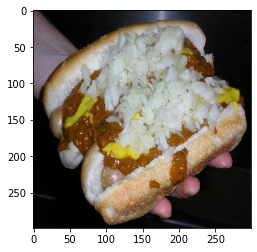

In [8]:
plt.imshow(X_train[0])

In [36]:
# Augmentation
train_datagen = ImageDataGenerator(
                                   rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness

optim = RMSprop(learning_rate=0.00001)
                                  

In [37]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(299,299,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation="relu"))
# cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dropout(0.24))
cnn_model.add(Dense(2,activation="softmax"))
cnn_model.compile(loss=losses.CategoricalCrossentropy(),optimizer=optim,metrics=['accuracy'])
history_cnn=cnn_model.fit(train_datagen.flow(X_train,y_train,  batch_size=32, 
                                       seed=27,
                                       shuffle=False),

    steps_per_epoch=X_train.shape[0]//32,
    batch_size=256,
    validation_data=(X_test,y_test),
    epochs=25,
    verbose=1)

Epoch 1/25


2022-10-21 15:09:39.804780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - ETA: 0s - loss: 1.9689 - accuracy: 0.5340

2022-10-21 15:10:18.654529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 45s 468ms/step - loss: 1.9689 - accuracy: 0.5340 - val_loss: 0.6930 - val_accuracy: 0.5357
Epoch 2/25
93/93 [==============================] - 39s 422ms/step - loss: 0.7275 - accuracy: 0.5441 - val_loss: 0.6931 - val_accuracy: 0.5435
Epoch 3/25
93/93 [==============================] - 35s 373ms/step - loss: 0.6931 - accuracy: 0.5741 - val_loss: 0.6929 - val_accuracy: 0.6211
Epoch 4/25
93/93 [==============================] - 36s 389ms/step - loss: 0.6851 - accuracy: 0.5772 - val_loss: 0.6927 - val_accuracy: 0.6522
Epoch 5/25
93/93 [==============================] - 37s 400ms/step - loss: 0.6864 - accuracy: 0.6011 - val_loss: 0.6926 - val_accuracy: 0.6227
Epoch 6/25
93/93 [==============================] - 37s 399ms/step - loss: 0.6698 - accuracy: 0.6078 - val_loss: 0.6922 - val_accuracy: 0.6584
Epoch 7/25
93/93 [==============================] - 36s 385ms/step - loss: 0.6667 - accuracy: 0.6112 - val_loss: 0.6920 - val_accuracy: 0.6677
Epoch 8/25

In [38]:
def plot_results(history_,loss):
    if (loss=="loss"):        
        train_loss = history_.history['loss']
        test_loss = history_.history['val_loss']
        label="Loss"
    elif (loss=="acc"):
        train_loss = history_.history['accuracy']
        test_loss = history_.history['val_accuracy']
        label="Accuracy"
    
    epoch_labels = history_.epoch

    # Set figure size.
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs.
    plt.plot(train_loss, label=f'Training {label}', color='#185fad')
    plt.plot(test_loss, label=f'Testing {label}', color='orange')

    # Set title
    plt.title(f'Training and Testing {label} by Epoch', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Categorical Crossentropy', fontsize=18)
    plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

    plt.legend(fontsize=18);

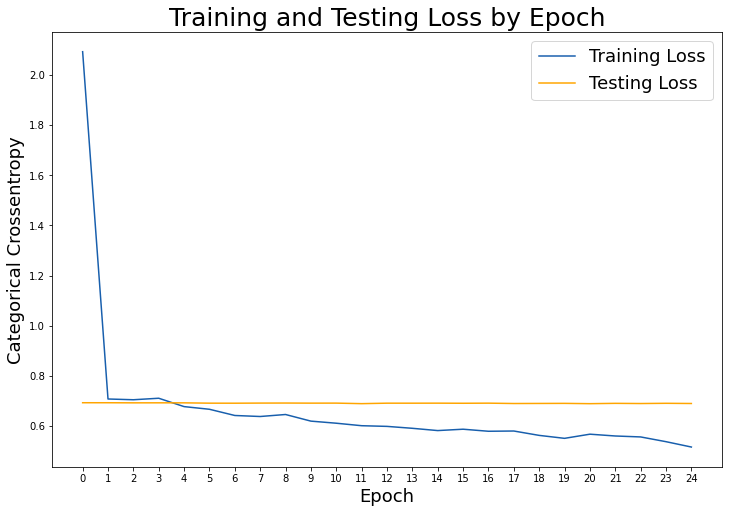

In [34]:
plot_results(history_cnn,"loss")

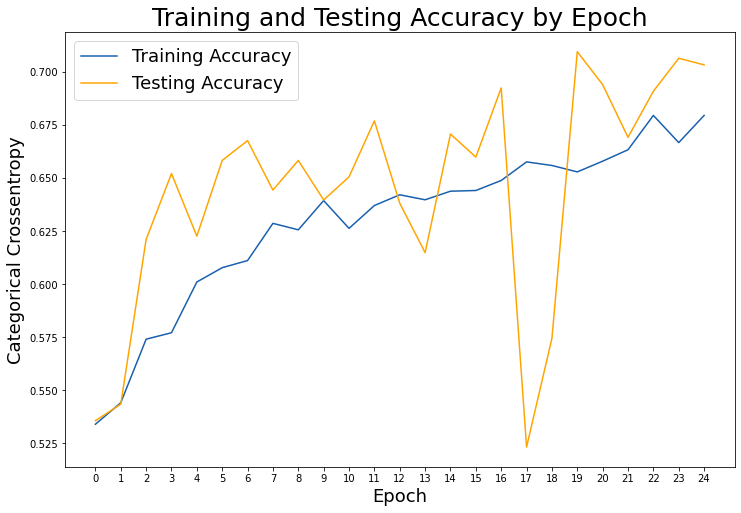

In [39]:
plot_results(history_cnn,"acc")

In [40]:
pickle.dump(cnn_model, open('model.p', 'wb'))

INFO:tensorflow:Assets written to: ram://d9643b3f-17ec-411e-b75d-8af88eff6ffc/assets


INFO:tensorflow:Assets written to: ram://d9643b3f-17ec-411e-b75d-8af88eff6ffc/assets


In [14]:
model_that_was_pickled = pickle.load(open('model.p', 'rb'))


In [16]:
model_that_was_pickled.predict(X_test)

 1/21 [>.............................] - ETA: 5s

2022-10-21 14:00:04.512053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 39ms/step


array([[0.17238902, 0.03906198],
       [0.10393173, 0.09163804],
       [0.32794476, 0.16359138],
       ...,
       [0.30175534, 0.23914498],
       [0.15264206, 0.03013753],
       [0.19545779, 0.02821513]], dtype=float32)